In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

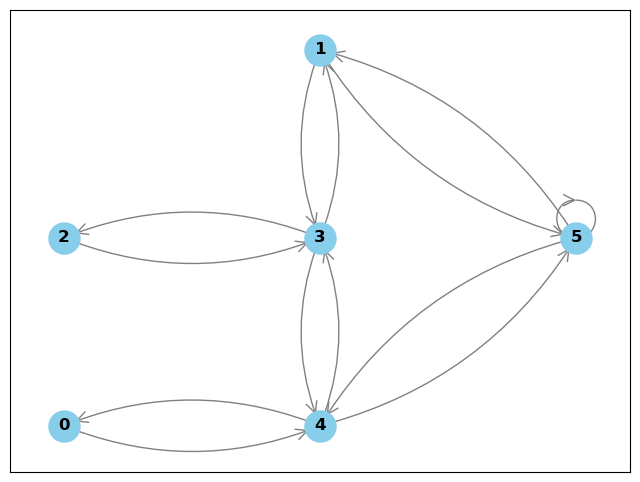

In [2]:
G = nx.DiGraph()

# Define edges with direction (from -> to and to -> from)
edges = [
    ('0', '4'), ('4', '0'),  
    ('1', '3'), ('3', '1'),  
    ('1', '5'), ('5', '1'),  
    ('2', '3'), ('3', '2'),  
    ('3', '4'), ('4', '3'),  
    ('4', '5'), ('5', '4'),  
    ('5', '5')               
]

# Add edges to the directed graph
G.add_edges_from(edges)

# Define positions for nodes
positions = {
    '0': (1, 0), '1': (3, 4), '2': (1, 2),
    '3': (3, 2), '4': (3, 0), '5': (5, 2)
}

# Draw the directed graph with separate arrows for each direction
plt.figure(figsize=(8, 6))
nx.draw_networkx_nodes(G, pos=positions, node_color='skyblue', node_size=500)
nx.draw_networkx_labels(G, pos=positions, font_size=12, font_weight='bold')

# Draw directed edges with arrows in each direction
nx.draw_networkx_edges(
    G, pos=positions, edgelist=edges,
    arrowstyle='->', arrowsize=20, connectionstyle="arc3,rad=0.2",
    edge_color='gray'
)

plt.show()

### Input Graph as Adjacency Matrix

In [3]:
A = [
    [0, 0, 0, 0, 1, 0],
    [0, 0, 0, 1, 0, 1],
    [0, 0, 0, 1, 0, 0],
    [0, 1, 1, 0, 1, 0],
    [1, 0, 0, 1, 0, 1],
    [0, 1, 0, 0, 1, 1]
]

In [4]:
goal_state = 5

### Reward Matrix 

Reward from one state directly to goal state = 100 </br>
Reward from any other state to another state = 0 </br>
Reward between two unconnected states = -1

In [5]:
R = np.ones((6, 6)) * -1
R = R.astype(int)

In [6]:
for i in range(np.shape(A)[0]):
    for j in range(np.shape(A)[1]):
        if (j != goal_state and A[i][j] == 1):
            R[i][j] = 0
        elif (A[i][j] == 1 and j == goal_state):
            R[i][j] = 100

### Initialize Q-Matrix 

In [7]:
Q = np.zeros((6, 6))
Q = Q.astype(int)
Q

array([[0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0]])

In [8]:
alpha = 0.9
g = 0.8
epsilon = 0.1  # Probability of choosing a random action

### Algorithm 

1. Randomly choose a state s </br>
2. Choose the first action  for state s using the epsilon greedy policy </br>
2. List down all possible actions for state s = (s,a) </br>
3. Randomly choose a state-action pair (s,a) and get its reward R(s,a) </br>
4. a chosen = next state (s') </br>
5. For this next state s', find a' using epsilon-greedy</br>
6. Do the following </br>
&nbsp; &nbsp; &nbsp; Q(s,a) = Q(s,a) + alpha*[R(s,a) + gamma*Q(s',a') - Q(s,a) ]</br>
&nbsp; &nbsp; &nbsp; Accordingly update the Q-Table </br>
7. s = s' </br>
8. Do this until you reach the goal state </br>
9. Try to fill in the Q-Table so you have values for all possible (s,a) </br>

In [9]:
current_state = np.random.randint(0, 6)
while current_state == goal_state:
    current_state = np.random.randint(0, 6)

In [10]:
current_state

0

In [11]:
'''
Use epsilon-greedy policy to choose an action:
If probability < epsilon, then go for exploration (randomly select an action)
If probability > epsilon, then go for exploitation (best action based on Q-value)
'''

def epsilon_greedy_action(current_state):
    # EXPLORATION
    if np.random.rand() < epsilon:  
        possible_actions = []
        for a in range(len(A[current_state])):
            if A[current_state][a] == 1:
                possible_actions.append(a)
        return np.random.choice(possible_actions) 
    
    # EXPLOITATION
    else:  
        return np.argmax(Q[current_state])  

In [12]:
num_episodes = 1000  # Total training episodes

for episode in range(num_episodes):
    current_state = np.random.randint(0, 6)
    while current_state == goal_state:
        current_state = np.random.randint(0, 6)

    # Choose the first action using ε-greedy
    action = epsilon_greedy_action(current_state)

    while current_state != goal_state:
        
        # All possible actions for current state
        current_state_possible_actions = []
        current_state_possible_action_pairs = []
        
        for a in range(len(A[current_state])):
            print("s : ",current_state,"a : ",a, "A[s][a] : ", A[current_state][a])
            if A[current_state][a] == 1:
                current_state_possible_actions.append(a)
                current_state_possible_action_pairs.append( (current_state, a) )
                
        print("Possible (s,a)")
        for i in current_state_possible_action_pairs:
            print(i)
        print()

        # Randomly choose a state-action pair
        index = np.random.randint(0,len(current_state_possible_action_pairs))
        state,action = current_state_possible_action_pairs[index]
        next_state = action
        print("next state : ", next_state)
        print()

        # Choose the next action using ε-greedy
        next_action = epsilon_greedy_action(next_state)

        # Q(s,a) = Q(s,a) + alpha * [ R(s,a) + gamma * Q(s',a') - Q(s,a) ]
        
        predict = Q[current_state][action]
        target  = R[current_state][action] + g * Q[next_state][next_action]
        Q[current_state][action] = Q[current_state][action] + alpha * (target-predict)

        current_state = next_state
        action = next_action  

s :  3 a :  0 A[s][a] :  0
s :  3 a :  1 A[s][a] :  1
s :  3 a :  2 A[s][a] :  1
s :  3 a :  3 A[s][a] :  0
s :  3 a :  4 A[s][a] :  1
s :  3 a :  5 A[s][a] :  0
Possible (s,a)
(3, 1)
(3, 2)
(3, 4)

next state :  4

s :  4 a :  0 A[s][a] :  1
s :  4 a :  1 A[s][a] :  0
s :  4 a :  2 A[s][a] :  0
s :  4 a :  3 A[s][a] :  1
s :  4 a :  4 A[s][a] :  0
s :  4 a :  5 A[s][a] :  1
Possible (s,a)
(4, 0)
(4, 3)
(4, 5)

next state :  3

s :  3 a :  0 A[s][a] :  0
s :  3 a :  1 A[s][a] :  1
s :  3 a :  2 A[s][a] :  1
s :  3 a :  3 A[s][a] :  0
s :  3 a :  4 A[s][a] :  1
s :  3 a :  5 A[s][a] :  0
Possible (s,a)
(3, 1)
(3, 2)
(3, 4)

next state :  2

s :  2 a :  0 A[s][a] :  0
s :  2 a :  1 A[s][a] :  0
s :  2 a :  2 A[s][a] :  0
s :  2 a :  3 A[s][a] :  1
s :  2 a :  4 A[s][a] :  0
s :  2 a :  5 A[s][a] :  0
Possible (s,a)
(2, 3)

next state :  3

s :  3 a :  0 A[s][a] :  0
s :  3 a :  1 A[s][a] :  1
s :  3 a :  2 A[s][a] :  1
s :  3 a :  3 A[s][a] :  0
s :  3 a :  4 A[s][a] :  1
s :  3 a :  5 A

s :  3 a :  5 A[s][a] :  0
Possible (s,a)
(3, 1)
(3, 2)
(3, 4)

next state :  4

s :  4 a :  0 A[s][a] :  1
s :  4 a :  1 A[s][a] :  0
s :  4 a :  2 A[s][a] :  0
s :  4 a :  3 A[s][a] :  1
s :  4 a :  4 A[s][a] :  0
s :  4 a :  5 A[s][a] :  1
Possible (s,a)
(4, 0)
(4, 3)
(4, 5)

next state :  0

s :  0 a :  0 A[s][a] :  0
s :  0 a :  1 A[s][a] :  0
s :  0 a :  2 A[s][a] :  0
s :  0 a :  3 A[s][a] :  0
s :  0 a :  4 A[s][a] :  1
s :  0 a :  5 A[s][a] :  0
Possible (s,a)
(0, 4)

next state :  4

s :  4 a :  0 A[s][a] :  1
s :  4 a :  1 A[s][a] :  0
s :  4 a :  2 A[s][a] :  0
s :  4 a :  3 A[s][a] :  1
s :  4 a :  4 A[s][a] :  0
s :  4 a :  5 A[s][a] :  1
Possible (s,a)
(4, 0)
(4, 3)
(4, 5)

next state :  3

s :  3 a :  0 A[s][a] :  0
s :  3 a :  1 A[s][a] :  1
s :  3 a :  2 A[s][a] :  1
s :  3 a :  3 A[s][a] :  0
s :  3 a :  4 A[s][a] :  1
s :  3 a :  5 A[s][a] :  0
Possible (s,a)
(3, 1)
(3, 2)
(3, 4)

next state :  2

s :  2 a :  0 A[s][a] :  0
s :  2 a :  1 A[s][a] :  0
s :  2 a :  2 A

In [13]:
Q

array([[ 0,  0,  0,  0, 79,  0],
       [ 0,  0,  0, 63,  0, 99],
       [ 0,  0,  0, 63,  0,  0],
       [ 0, 79, 50,  0, 76,  0],
       [63,  0,  0, 62,  0, 99],
       [ 0,  0,  0,  0,  0,  0]])